### Gas demand correlations ###

Using NGrid data from Hazel (Thornton et al., 2019) for exploring the decadal relationship between different climate predictors (surface variables, indicies etc.) and UK gas demand (which has been postprocessed to remove non-linear trends).

In [1]:
# Local libraries
import os
import sys
import glob

# Third-party libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import pearsonr

These data are in .dat format, so we will need to convert this into .csv with NaNs using Pandas.

In [2]:
# Print the files in the directory
dir = "/home/users/benhutch/NGrid_demand"

# List the files in this directory
os.listdir(dir)

['Electricity_demand_5yrRmean_full_GB.dat',
 'Electricity_demand_5yrRmean_full_nonhol_GB.dat',
 'Gas_demand_5yrRmean_full_GB.dat',
 'Gas_demand_5yrRmean_full_nonhol_GB.dat',
 'Gas_raw_demand_GB.dat',
 'csv_files']

### Data description ###

#### Electricity demand ####

* *Electricity_demand_5yrRmean_full_GB.dat* - daily UK electricity demand data with the 5-year running mean removed including data for weekends and holidays.
* *Electricity_demand_5yrRmean_full_nonhol_GB.dat* - daily UK electricity demand data with the 5-year running mean removed *not* including data for weekends and holidays.

#### Gas demand ####

* *Gas_raw_demand_GB.dat* - daily gas demand for the UK.
* *Gas_demand_5yrRmean_full_GB.dat* - daily gas demand for the UK with the 5-year running mean removed.
* *Gas_demand_5yrRmean_full_nonhol_GB.dat* - daily gas demand for the UK with the 5-year running mean removed *not* including data for weekends and holidays.

In [3]:
# # We want to load these all into a .csv file
# raw_gas_file = "Gas_raw_demand_GB.dat"

# # load using pandas
# df_raw_gas = pd.read_csv(os.path.join(dir, raw_gas_file), sep=" ", header=0)

In [4]:
# df_raw_gas.head()

In [5]:
# # set the filename
# output_file = "gas_electricity_demand_data.csv"

# # output directory
# output_dir = "/home/users/benhutch/NGrid_demand/csv_files"

# # if the directory does not exist, create it
# if not os.path.exists(output_dir):
#     os.makedirs(output_dir)

# # save the dataframe to a .csv file
# df_merged.to_csv(os.path.join(output_dir, output_file), index=False)

### Processing the .csv file ###

This .csv needs to be processed using the same averaging as the UREAD-ERA5 datasets.

In [6]:
# csv_file_path = "/home/users/benhutch/NGrid_demand/csv_files/gas_electricity_demand_data.csv"

# # Load in the data
# df = pd.read_csv(csv_file_path)

In [7]:
# # Collapse into monthly averages
# # assert the date column is a datetime object
# df["date"] = pd.to_datetime(df["date"])

In [8]:
# # set the date as the index
# df.set_index("date", inplace=True)

In [9]:
# # Take monthly averages
# df_monthly = df.resample("M").mean()

In [10]:
# # Set up the months of interest
# ondjfm_months = [10, 11, 12, 1, 2, 3]

# # Select only the months of interest
# df_ondjfm = df_monthly[df_monthly.index.month.isin(ondjfm_months)]

In [11]:
# # Shift back by -3 months
# df_ondjfm_shifted = df_ondjfm.shift(-3)

# # Remove the first 3 months of data and the last 3 months of data
# df_ondjfm_shifted = df_ondjfm_shifted.iloc[3:-3]

# # Take the annual mean
# # each annual mean is the mean of the 6 months ONDJFM
# # e.g. for 1960, the annual mean is the mean of the months October 1960 - March 1961
# df_annual = df_ondjfm_shifted.resample("A").mean()

In [12]:
# # Take the 8-year rolling mean
# df_rolling = df_annual.rolling(window=8, center=True).mean()

In [13]:
# # set date back to a column
# df_rolling.reset_index(inplace=True)

In [14]:
# # set up a new filename
# output_file = "8yrRM_ONDJFM_gas_electricity_demand_data.csv"

# # # output directory
# output_dir = "/home/users/benhutch/NGrid_demand/csv_files"

# # save the dataframe to a .csv file
# df_rolling.to_csv(os.path.join(output_dir, output_file), index=False)

In [15]:
# # # output directory
output_dir = "/home/users/benhutch/NGrid_demand/csv_files"

# list the files in the directory
os.listdir(output_dir)

['gas_electricity_demand_data.csv',
 '8yrRM_ONDJFM_gas_electricity_demand_data.csv',
 'obs_delta_P.csv',
 'obs_NAO.csv',
 'obs_UK_historical_temp_detrend_0.csv',
 'climate_indices_demand.csv',
 'ERA5_full_demand_1979_2018_8yrRM_ONDJFM.csv',
 'ERA5_weather_dependent_demand_1979_2018_8yrRM_ONDJFM.csv']

In [16]:
# Open the files
df_demand = pd.read_csv(os.path.join(output_dir, "8yrRM_ONDJFM_gas_electricity_demand_data.csv"))

# Open the delta P file
df_delta_P = pd.read_csv(os.path.join(output_dir, "obs_delta_P.csv"))

# Open the NAO file
df_NAO = pd.read_csv(os.path.join(output_dir, "obs_NAO.csv"))

# OPen the temperature file
df_temp = pd.read_csv(os.path.join(output_dir, "obs_UK_historical_temp_detrend_0.csv"))

In [17]:
# change the name of NAO anomaly (Pa) to delta P anomaly (Pa)
df_delta_P.rename(columns={"NAO anomaly (Pa)": "delta P anomaly (Pa)"}, inplace=True)

In [18]:
#change the column UK to UK_temp_anomaly
df_temp.rename(columns={"UK": "UK_temp_anomaly"}, inplace=True)

In [19]:
# join the dataframes df_delta_P and df_NAO
df_merged = pd.merge(df_NAO, df_delta_P, on="index")

In [20]:
# join df_merged with df_temp on index
df_merged = pd.merge(df_merged, df_temp, on="index")

In [21]:
# in df_merged change the name of the index column to date
df_merged.rename(columns={"index": "date"}, inplace=True)

In [22]:
# merge climat indices with gas demand time series
df_merged = df_merged.merge(df_demand, on="date", how="left")

In [23]:
df_merged.head()

,date,NAO anomaly (Pa),delta P anomaly (Pa),UK_temp_anomaly,elec_demand_5yrRmean,elec_demand_5yrRmean_nohols,gas_demand_5yrRmean,gas_demand_5yrRmean_nohols,gas_demand_raw
0,1964-12-31,-459.574041,-266.863413,4.910844,NaN,NaN,NaN,NaN,NaN
1,1965-12-31,-690.520941,-402.505753,4.787535,NaN,NaN,NaN,NaN,NaN
2,1966-12-31,-668.601591,-396.281847,4.835569,NaN,NaN,NaN,NaN,NaN
3,1967-12-31,-603.603464,-311.324045,5.176834,NaN,NaN,NaN,NaN,NaN
4,1968-12-31,-487.695747,-261.748211,5.318128,NaN,NaN,NaN,NaN,NaN


Text(0, 0.5, 'Normalised anomaly')

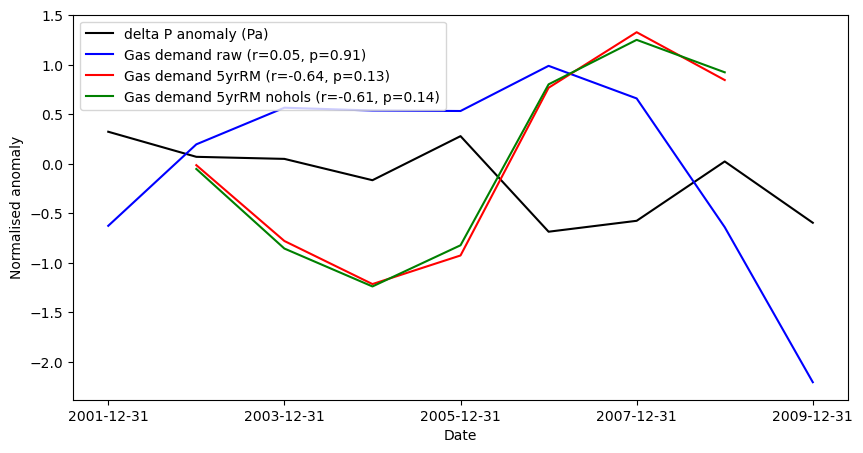

In [24]:
# Now plot the delta P anomaly against the gas demand datasets
fig, ax = plt.subplots(1, 1, figsize=(10, 5))

# Normalise the delta P anomaly
delta_P_norm = (df_merged["delta P anomaly (Pa)"] - df_merged["delta P anomaly (Pa)"].mean()) / df_merged["delta P anomaly (Pa)"].std()

# Normalise the gas demand
gas_demand_raw_norm = (df_merged["gas_demand_raw"] - df_merged["gas_demand_raw"].mean()) / df_merged["gas_demand_raw"].std()

# normalise the gas demand 5 year rolling mean
gas_demand_5yrRM_norm = (df_merged["gas_demand_5yrRmean"] - df_merged["gas_demand_5yrRmean"].mean()) / df_merged["gas_demand_5yrRmean"].std()

# normalise the gas demand 5 year rolling mean no holidays
gas_demand_5yrRM_nohols_norm = (df_merged["gas_demand_5yrRmean_nohols"] - df_merged["gas_demand_5yrRmean_nohols"].mean()) / df_merged["gas_demand_5yrRmean_nohols"].std()

# Find the indices where both delta_P_norm and gas_demand_raw_norm are not NaN
not_nan_indices = ~np.isnan(delta_P_norm) & ~np.isnan(gas_demand_raw_norm)

# Select only the rows where both delta_P_norm and gas_demand_raw_norm are not NaN
delta_P_norm_not_nan_long = delta_P_norm[not_nan_indices]
gas_demand_raw_norm_not_nan = gas_demand_raw_norm[not_nan_indices]
dates_raw = df_merged["date"][not_nan_indices]

# Calculate the correlation between the delta P anomaly and the gas demand
corr_gas_demand_raw, p_gas_demand_raw = pearsonr(delta_P_norm_not_nan_long, gas_demand_raw_norm_not_nan)

# Find the indices where both delta_P_norm and gas_demand_5yrRM_norm are not NaN
not_nan_indices = ~np.isnan(delta_P_norm) & ~np.isnan(gas_demand_5yrRM_norm)

# Select only the rows where both delta_P_norm and gas_demand_5yrRM_norm are not NaN
delta_P_norm_not_nan = delta_P_norm[not_nan_indices]

gas_demand_5yrRM_norm_not_nan = gas_demand_5yrRM_norm[not_nan_indices]

# Same for nohols
gas_demand_5yrRM_nohols_norm_not_nan = gas_demand_5yrRM_nohols_norm[not_nan_indices]

# dates 5yrRM
dates_5yrRM = df_merged["date"][not_nan_indices]

# Calculate correlations and p-vals
corr_gas_demand_5yrRM, p_gas_demand_5yrRM = pearsonr(delta_P_norm_not_nan, gas_demand_5yrRM_norm_not_nan)
corr_gas_demand_5yrRM_nohols, p_gas_demand_5yrRM_nohols = pearsonr(delta_P_norm_not_nan, gas_demand_5yrRM_nohols_norm_not_nan)

# plot the normalised delta P anomaly
ax.plot(dates_raw, delta_P_norm_not_nan_long, label="delta P anomaly (Pa)", color="black")

# Plot the variables and include the correlation and p-value in the labels
ax.plot(dates_raw, gas_demand_raw_norm_not_nan, label=f"Gas demand raw (r={corr_gas_demand_raw:.2f}, p={p_gas_demand_raw:.2f})", color="blue")
ax.plot(dates_5yrRM, gas_demand_5yrRM_norm_not_nan, label=f"Gas demand 5yrRM (r={corr_gas_demand_5yrRM:.2f}, p={p_gas_demand_5yrRM:.2f})", color="red")
ax.plot(dates_5yrRM, gas_demand_5yrRM_nohols_norm_not_nan, label=f"Gas demand 5yrRM nohols (r={corr_gas_demand_5yrRM_nohols:.2f}, p={p_gas_demand_5yrRM_nohols:.2f})", color="green")

# set the x-axis to be the date
ax.set_xlabel("Date")

# Set the x-ticks to be 10 years apart
ax.set_xticks(dates_raw[::2])

# include the legend
ax.legend(loc="upper left")

# set the y-axis label
ax.set_ylabel("Normalised anomaly")


Text(0, 0.5, 'Normalised anomaly')

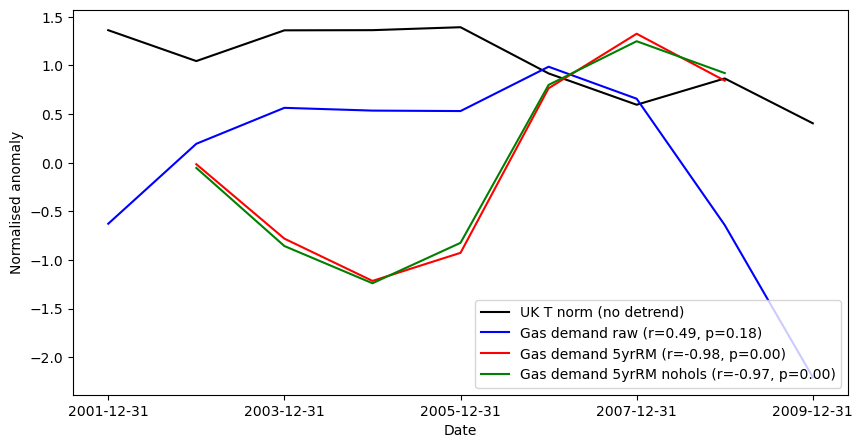

In [25]:
# do the same but for NAO
# Now plot the delta P anomaly against the gas demand datasets
fig, ax = plt.subplots(1, 1, figsize=(10, 5))

# Normalise the delta P anomaly
UK_T_norm = (df_merged["UK_temp_anomaly"] - df_merged["UK_temp_anomaly"].mean()) / df_merged["UK_temp_anomaly"].std()

# Normalise the gas demand
gas_demand_raw_norm = (df_merged["gas_demand_raw"] - df_merged["gas_demand_raw"].mean()) / df_merged["gas_demand_raw"].std()

# normalise the gas demand 5 year rolling mean
gas_demand_5yrRM_norm = (df_merged["gas_demand_5yrRmean"] - df_merged["gas_demand_5yrRmean"].mean()) / df_merged["gas_demand_5yrRmean"].std()

# normalise the gas demand 5 year rolling mean no holidays
gas_demand_5yrRM_nohols_norm = (df_merged["gas_demand_5yrRmean_nohols"] - df_merged["gas_demand_5yrRmean_nohols"].mean()) / df_merged["gas_demand_5yrRmean_nohols"].std()

# Find the indices where both UK_T_norm and gas_demand_raw_norm are not NaN
not_nan_indices = ~np.isnan(UK_T_norm) & ~np.isnan(gas_demand_raw_norm)

# Select only the rows where both UK_T_norm and gas_demand_raw_norm are not NaN
delta_P_norm_not_nan_long = UK_T_norm[not_nan_indices]
gas_demand_raw_norm_not_nan = gas_demand_raw_norm[not_nan_indices]

# Calculate the correlation between the delta P anomaly and the gas demand
corr_gas_demand_raw, p_gas_demand_raw = pearsonr(delta_P_norm_not_nan_long, gas_demand_raw_norm_not_nan)

# Find the indices where both UK_T_norm and gas_demand_5yrRM_norm are not NaN
not_nan_indices = ~np.isnan(UK_T_norm) & ~np.isnan(gas_demand_5yrRM_norm)

# Select only the rows where both UK_T_norm and gas_demand_5yrRM_norm are not NaN
delta_P_norm_not_nan = UK_T_norm[not_nan_indices]

gas_demand_5yrRM_norm_not_nan = gas_demand_5yrRM_norm[not_nan_indices]

# Same for nohols
gas_demand_5yrRM_nohols_norm_not_nan = gas_demand_5yrRM_nohols_norm[not_nan_indices]

# Calculate correlations and p-vals
corr_gas_demand_5yrRM, p_gas_demand_5yrRM = pearsonr(delta_P_norm_not_nan, gas_demand_5yrRM_norm_not_nan)
corr_gas_demand_5yrRM_nohols, p_gas_demand_5yrRM_nohols = pearsonr(delta_P_norm_not_nan, gas_demand_5yrRM_nohols_norm_not_nan)

# plot the normalised delta P anomaly
ax.plot(dates_raw, delta_P_norm_not_nan_long, label="UK T norm (no detrend)", color="black")

# Plot the variables and include the correlation and p-value in the labels
ax.plot(dates_raw, gas_demand_raw_norm_not_nan, label=f"Gas demand raw (r={corr_gas_demand_raw:.2f}, p={p_gas_demand_raw:.2f})", color="blue")
ax.plot(dates_5yrRM, gas_demand_5yrRM_norm_not_nan, label=f"Gas demand 5yrRM (r={corr_gas_demand_5yrRM:.2f}, p={p_gas_demand_5yrRM:.2f})", color="red")
ax.plot(dates_5yrRM, gas_demand_5yrRM_nohols_norm_not_nan, label=f"Gas demand 5yrRM nohols (r={corr_gas_demand_5yrRM_nohols:.2f}, p={p_gas_demand_5yrRM_nohols:.2f})", color="green")

# set the x-axis to be the date
ax.set_xlabel("Date")

# Set the x-ticks to be 10 years apart
ax.set_xticks(dates_raw[::2])

# include the legend
ax.legend(loc="lower right")

# set the y-axis label
ax.set_ylabel("Normalised anomaly")


Text(0, 0.5, 'Normalised anomaly')

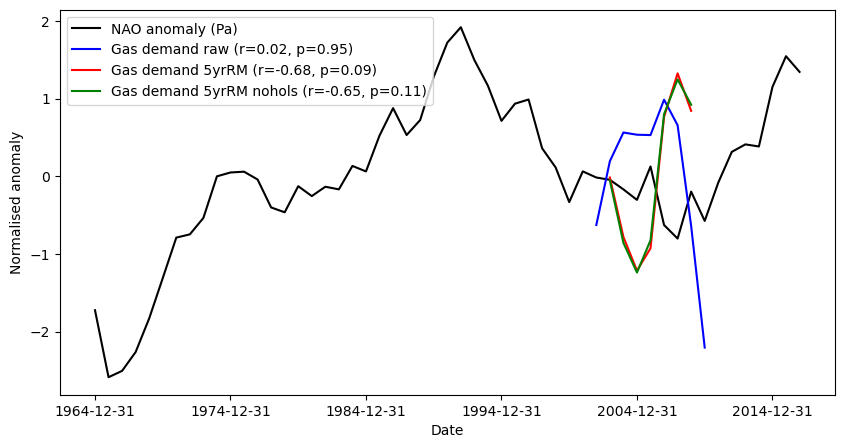

In [26]:
# Same for temperature
# do the same but for NAO
# Now plot the delta P anomaly against the gas demand datasets
fig, ax = plt.subplots(1, 1, figsize=(10, 5))

# Normalise the delta P anomaly
NAO_norm = (df_merged["NAO anomaly (Pa)"] - df_merged["NAO anomaly (Pa)"].mean()) / df_merged["NAO anomaly (Pa)"].std()

# Normalise the gas demand
gas_demand_raw_norm = (df_merged["gas_demand_raw"] - df_merged["gas_demand_raw"].mean()) / df_merged["gas_demand_raw"].std()

# normalise the gas demand 5 year rolling mean
gas_demand_5yrRM_norm = (df_merged["gas_demand_5yrRmean"] - df_merged["gas_demand_5yrRmean"].mean()) / df_merged["gas_demand_5yrRmean"].std()

# normalise the gas demand 5 year rolling mean no holidays
gas_demand_5yrRM_nohols_norm = (df_merged["gas_demand_5yrRmean_nohols"] - df_merged["gas_demand_5yrRmean_nohols"].mean()) / df_merged["gas_demand_5yrRmean_nohols"].std()

# Find the indices where both NAO_norm and gas_demand_raw_norm are not NaN
not_nan_indices = ~np.isnan(NAO_norm) & ~np.isnan(gas_demand_raw_norm)

# Select only the rows where both NAO_norm and gas_demand_raw_norm are not NaN
delta_P_norm_not_nan = NAO_norm[not_nan_indices]
gas_demand_raw_norm_not_nan = gas_demand_raw_norm[not_nan_indices]

# Calculate the correlation between the delta P anomaly and the gas demand
corr_gas_demand_raw, p_gas_demand_raw = pearsonr(delta_P_norm_not_nan, gas_demand_raw_norm_not_nan)

# Find the indices where both NAO_norm and gas_demand_5yrRM_norm are not NaN
not_nan_indices = ~np.isnan(NAO_norm) & ~np.isnan(gas_demand_5yrRM_norm)

# Select only the rows where both NAO_norm and gas_demand_5yrRM_norm are not NaN
delta_P_norm_not_nan = NAO_norm[not_nan_indices]

gas_demand_5yrRM_norm_not_nan = gas_demand_5yrRM_norm[not_nan_indices]

# Same for nohols
gas_demand_5yrRM_nohols_norm_not_nan = gas_demand_5yrRM_nohols_norm[not_nan_indices]

# Calculate correlations and p-vals
corr_gas_demand_5yrRM, p_gas_demand_5yrRM = pearsonr(delta_P_norm_not_nan, gas_demand_5yrRM_norm_not_nan)
corr_gas_demand_5yrRM_nohols, p_gas_demand_5yrRM_nohols = pearsonr(delta_P_norm_not_nan, gas_demand_5yrRM_nohols_norm_not_nan)

# plot the normalised delta P anomaly
ax.plot(df_merged["date"], NAO_norm, label="NAO anomaly (Pa)", color="black")

# Plot the variables and include the correlation and p-value in the labels
ax.plot(df_merged["date"], gas_demand_raw_norm, label=f"Gas demand raw (r={corr_gas_demand_raw:.2f}, p={p_gas_demand_raw:.2f})", color="blue")
ax.plot(df_merged["date"], gas_demand_5yrRM_norm, label=f"Gas demand 5yrRM (r={corr_gas_demand_5yrRM:.2f}, p={p_gas_demand_5yrRM:.2f})", color="red")
ax.plot(df_merged["date"], gas_demand_5yrRM_nohols_norm, label=f"Gas demand 5yrRM nohols (r={corr_gas_demand_5yrRM_nohols:.2f}, p={p_gas_demand_5yrRM_nohols:.2f})", color="green")

# set the x-axis to be the date
ax.set_xlabel("Date")

# Set the x-ticks to be 10 years apart
ax.set_xticks(df_merged["date"][::10])

# include the legend
ax.legend(loc="upper left")

# set the y-axis label
ax.set_ylabel("Normalised anomaly")


Text(0, 0.5, 'Normalised anomaly')

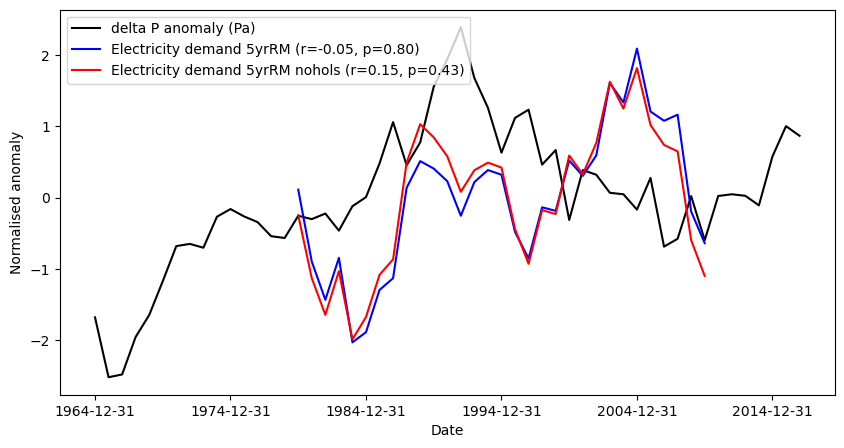

In [27]:
# Now do the same thing but for electricity demand
fig, ax = plt.subplots(1, 1, figsize=(10, 5))

# Normalise the delta P anomaly
delta_P_norm = (df_merged["delta P anomaly (Pa)"] - df_merged["delta P anomaly (Pa)"].mean()) / df_merged["delta P anomaly (Pa)"].std()

# Normalise the electricity demand
elec_demand_raw_norm = (df_merged["elec_demand_5yrRmean"] - df_merged["elec_demand_5yrRmean"].mean()) / df_merged["elec_demand_5yrRmean"].std()

# normalise the electricity demand nohols
elec_demand_nohols_norm = (df_merged["elec_demand_5yrRmean_nohols"] - df_merged["elec_demand_5yrRmean_nohols"].mean()) / df_merged["elec_demand_5yrRmean_nohols"].std()

# Find the indices where both delta_P_norm and elec_demand_raw_norm are not NaN
not_nan_indices = ~np.isnan(delta_P_norm) & ~np.isnan(elec_demand_raw_norm)

# Apply these indices to all of the time series
delta_P_norm_not_nan = delta_P_norm[not_nan_indices]
elec_demand_raw_norm_not_nan = elec_demand_raw_norm[not_nan_indices]
elec_demand_nohols_norm_not_nan = elec_demand_nohols_norm[not_nan_indices]

# Calculate the correlation between the delta P anomaly and the gas demand
corr_elec_demand_raw, p_elec_demand_raw = pearsonr(delta_P_norm_not_nan, elec_demand_raw_norm_not_nan)
corr_elec_demand_nohols, p_elec_demand_nohols = pearsonr(delta_P_norm_not_nan, elec_demand_nohols_norm_not_nan)

# plot the normalised delta P anomaly
ax.plot(df_merged["date"], delta_P_norm, label="delta P anomaly (Pa)", color="black")

# Plot the variables and include the correlation and p-value in the labels
ax.plot(df_merged["date"], elec_demand_raw_norm, label=f"Electricity demand 5yrRM (r={corr_elec_demand_raw:.2f}, p={p_elec_demand_raw:.2f})", color="blue")

ax.plot(df_merged["date"], elec_demand_nohols_norm, label=f"Electricity demand 5yrRM nohols (r={corr_elec_demand_nohols:.2f}, p={p_elec_demand_nohols:.2f})", color="red")

# set the x-axis to be the date
ax.set_xlabel("Date")

# Set the x-ticks to be 10 years apart
ax.set_xticks(df_merged["date"][::10])

# include the legend
ax.legend(loc="upper left")

# set the y-axis label
ax.set_ylabel("Normalised anomaly")

Text(0, 0.5, 'Normalised anomaly')

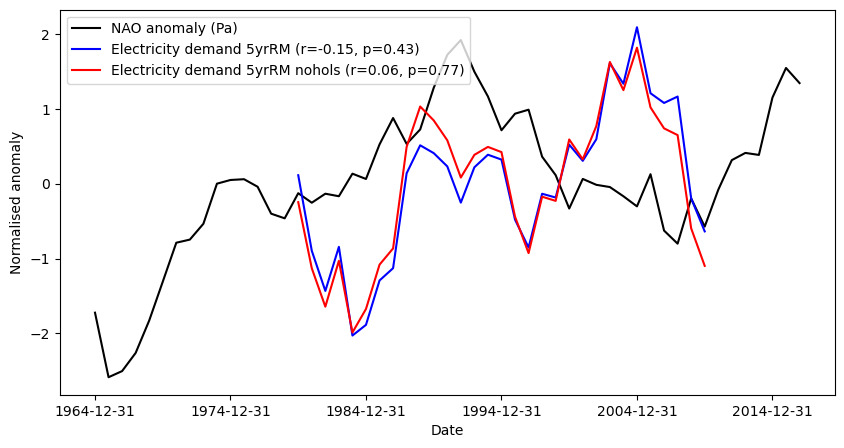

In [28]:
# Same for NAO
fig, ax = plt.subplots(1, 1, figsize=(10, 5))

# Normalise the delta P anomaly
NAO_norm = (df_merged["NAO anomaly (Pa)"] - df_merged["NAO anomaly (Pa)"].mean()) / df_merged["NAO anomaly (Pa)"].std()

# Normalise the electricity demand
elec_demand_raw_norm = (df_merged["elec_demand_5yrRmean"] - df_merged["elec_demand_5yrRmean"].mean()) / df_merged["elec_demand_5yrRmean"].std()

# normalise the electricity demand nohols
elec_demand_nohols_norm = (df_merged["elec_demand_5yrRmean_nohols"] - df_merged["elec_demand_5yrRmean_nohols"].mean()) / df_merged["elec_demand_5yrRmean_nohols"].std()

# Find the indices where both NAO_norm and elec_demand_raw_norm are not NaN
not_nan_indices = ~np.isnan(NAO_norm) & ~np.isnan(elec_demand_raw_norm)

# Apply these indices to all of the time series
delta_P_norm_not_nan = NAO_norm[not_nan_indices]
elec_demand_raw_norm_not_nan = elec_demand_raw_norm[not_nan_indices]
elec_demand_nohols_norm_not_nan = elec_demand_nohols_norm[not_nan_indices]

# Calculate the correlation between the delta P anomaly and the gas demand
corr_elec_demand_raw, p_elec_demand_raw = pearsonr(delta_P_norm_not_nan, elec_demand_raw_norm_not_nan)
corr_elec_demand_nohols, p_elec_demand_nohols = pearsonr(delta_P_norm_not_nan, elec_demand_nohols_norm_not_nan)

# plot the normalised delta P anomaly
ax.plot(df_merged["date"], NAO_norm, label="NAO anomaly (Pa)", color="black")

# Plot the variables and include the correlation and p-value in the labels
ax.plot(df_merged["date"], elec_demand_raw_norm, label=f"Electricity demand 5yrRM (r={corr_elec_demand_raw:.2f}, p={p_elec_demand_raw:.2f})", color="blue")

ax.plot(df_merged["date"], elec_demand_nohols_norm, label=f"Electricity demand 5yrRM nohols (r={corr_elec_demand_nohols:.2f}, p={p_elec_demand_nohols:.2f})", color="red")

# set the x-axis to be the date
ax.set_xlabel("Date")

# Set the x-ticks to be 10 years apart
ax.set_xticks(df_merged["date"][::10])

# include the legend
ax.legend(loc="upper left")

# set the y-axis label
ax.set_ylabel("Normalised anomaly")

Text(0, 0.5, 'Normalised anomaly')

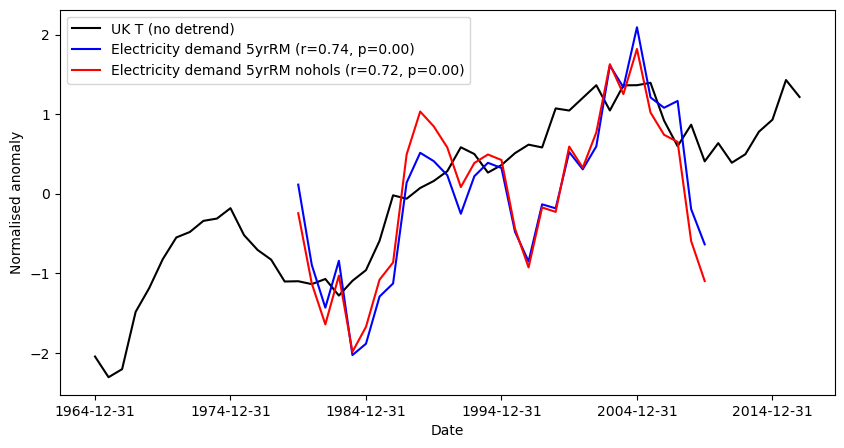

In [29]:
# Same for UK T
fig, ax = plt.subplots(1, 1, figsize=(10, 5))

# Normalise the delta P anomaly
UK_T_norm = (df_merged["UK_temp_anomaly"] - df_merged["UK_temp_anomaly"].mean()) / df_merged["UK_temp_anomaly"].std()

# Normalise the electricity demand
elec_demand_raw_norm = (df_merged["elec_demand_5yrRmean"] - df_merged["elec_demand_5yrRmean"].mean()) / df_merged["elec_demand_5yrRmean"].std()

# normalise the electricity demand nohols
elec_demand_nohols_norm = (df_merged["elec_demand_5yrRmean_nohols"] - df_merged["elec_demand_5yrRmean_nohols"].mean()) / df_merged["elec_demand_5yrRmean_nohols"].std()

# Find the indices where both UK_T_norm and elec_demand_raw_norm are not NaN
not_nan_indices = ~np.isnan(UK_T_norm) & ~np.isnan(elec_demand_raw_norm)

# Apply these indices to all of the time series
delta_P_norm_not_nan = UK_T_norm[not_nan_indices]
elec_demand_raw_norm_not_nan = elec_demand_raw_norm[not_nan_indices]
elec_demand_nohols_norm_not_nan = elec_demand_nohols_norm[not_nan_indices]

# Calculate the correlation between the delta P anomaly and the gas demand
corr_elec_demand_raw, p_elec_demand_raw = pearsonr(delta_P_norm_not_nan, elec_demand_raw_norm_not_nan)
corr_elec_demand_nohols, p_elec_demand_nohols = pearsonr(delta_P_norm_not_nan, elec_demand_nohols_norm_not_nan)

# plot the normalised delta P anomaly
ax.plot(df_merged["date"], UK_T_norm, label="UK T (no detrend)", color="black")

# Plot the variables and include the correlation and p-value in the labels
ax.plot(df_merged["date"], elec_demand_raw_norm, label=f"Electricity demand 5yrRM (r={corr_elec_demand_raw:.2f}, p={p_elec_demand_raw:.2f})", color="blue")

ax.plot(df_merged["date"], elec_demand_nohols_norm, label=f"Electricity demand 5yrRM nohols (r={corr_elec_demand_nohols:.2f}, p={p_elec_demand_nohols:.2f})", color="red")

# set the x-axis to be the date
ax.set_xlabel("Date")

# Set the x-ticks to be 10 years apart
ax.set_xticks(df_merged["date"][::10])

# include the legend
ax.legend(loc="upper left")

# set the y-axis label
ax.set_ylabel("Normalised anomaly")

Text(0, 0.5, 'Normalised anomaly')

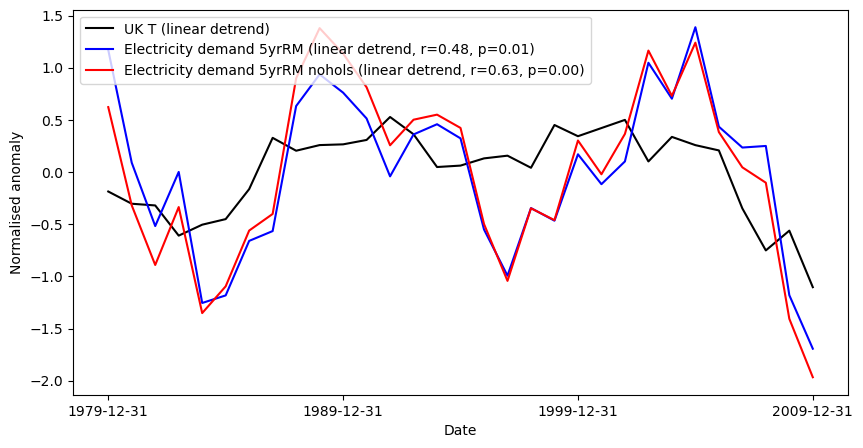

In [30]:
# import signal from scipy
from scipy import signal

# Same for UK T
fig, ax = plt.subplots(1, 1, figsize=(10, 5))

# Normalise the delta P anomaly
UK_T_norm = (df_merged["UK_temp_anomaly"] - df_merged["UK_temp_anomaly"].mean()) / df_merged["UK_temp_anomaly"].std()

# Normalise the electricity demand
elec_demand_raw_norm = (df_merged["elec_demand_5yrRmean"] - df_merged["elec_demand_5yrRmean"].mean()) / df_merged["elec_demand_5yrRmean"].std()

# normalise the electricity demand nohols
elec_demand_nohols_norm = (df_merged["elec_demand_5yrRmean_nohols"] - df_merged["elec_demand_5yrRmean_nohols"].mean()) / df_merged["elec_demand_5yrRmean_nohols"].std()

# Find the indices where both UK_T_norm and elec_demand_raw_norm are not NaN
not_nan_indices = ~np.isnan(UK_T_norm) & ~np.isnan(elec_demand_raw_norm)

# Apply these indices to all of the time series
delta_P_norm_not_nan = UK_T_norm[not_nan_indices]
elec_demand_raw_norm_not_nan = elec_demand_raw_norm[not_nan_indices]
elec_demand_nohols_norm_not_nan = elec_demand_nohols_norm[not_nan_indices]

# Apply this to the time axes
time = df_merged["date"][not_nan_indices]

# detrend the UK_T_norm
delta_P_norm_not_nan = signal.detrend(delta_P_norm_not_nan)

# detrend the elec_demand_raw_norm
elec_demand_raw_norm_not_nan = signal.detrend(elec_demand_raw_norm_not_nan)

# detrend the elec_demand_nohols_norm
elec_demand_nohols_norm_not_nan = signal.detrend(elec_demand_nohols_norm_not_nan)

# Calculate the correlation between the delta P anomaly and the gas demand
corr_elec_demand_raw, p_elec_demand_raw = pearsonr(delta_P_norm_not_nan, elec_demand_raw_norm_not_nan)
corr_elec_demand_nohols, p_elec_demand_nohols = pearsonr(delta_P_norm_not_nan, elec_demand_nohols_norm_not_nan)

# plot the normalised delta P anomaly
ax.plot(time, delta_P_norm_not_nan, label="UK T (linear detrend)", color="black")

# Plot the variables and include the correlation and p-value in the labels
ax.plot(time, elec_demand_raw_norm_not_nan, label=f"Electricity demand 5yrRM (linear detrend, r={corr_elec_demand_raw:.2f}, p={p_elec_demand_raw:.2f})", color="blue")

ax.plot(time, elec_demand_nohols_norm_not_nan, label=f"Electricity demand 5yrRM nohols (linear detrend, r={corr_elec_demand_nohols:.2f}, p={p_elec_demand_nohols:.2f})", color="red")

# set the x-axis to be the date
ax.set_xlabel("Date")

# Set the x-ticks to be 10 years apart
ax.set_xticks(time[::10])

# include the legend
ax.legend(loc="upper left")

# set the y-axis label
ax.set_ylabel("Normalised anomaly")